In [40]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

In [41]:
cv2.__version__, np.__version__, matplotlib.__version__

('3.3.1', '1.19.5', '3.3.4')

# Задание 3 #

Подсчет объектов: круги, квадраты, треугольники, а также их вариации типа квадрат с треугольной дыркой или круг с двумя квадратными дырками. Классификация (ручная), сколько каждого класса. Например, подсчет суммы по монетам (они не перекрываются). В данной задаче рассматривается "идеальный" вариант: фон однотонный. Используются фильтры: сглаживание, пороговые, производная. Поиск контуров.

## 3.0. Генерация ##

In [450]:
image = np.zeros((300,300))

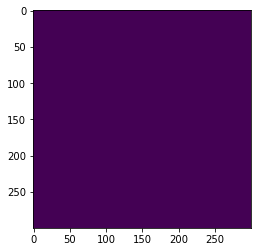

In [451]:
plt.imshow(image)

In [452]:
n_fig = 2 # 4 фигуры, 2 их них - с дырками
for fig in range(n_fig): 
    rad = np.random.random_integers(30, 70, 1)[0] # случайный радиус
    cntr = tuple(np.random.random_integers(0, image.shape[0], size = 2)) # две случайные координаты
    cv2.circle(img = image, center = cntr, radius = rad, color = 255, thickness = -1)
    pt1, pt2 = np.random.random_integers(0, image.shape[0], size = 2)
    cv2.rectangle(img = image, pt1 = (pt1, pt2), pt2=(pt1+rad, pt2+rad), color = 255, thickness = -1)
    # Можно добавить дырок
    cv2.rectangle(img = image, pt1 = (pt1+rad//3, pt2+rad//3), pt2=(pt1+rad//2, pt2+rad//2), color = 0, thickness = -1)

X:\Users\jeka_\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(30, 70 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until
X:\Users\jeka_\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(0, 300 + 1) instead
  after removing the cwd from sys.path.
X:\Users\jeka_\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: This function is deprecated. Please call randint(0, 300 + 1) instead
  


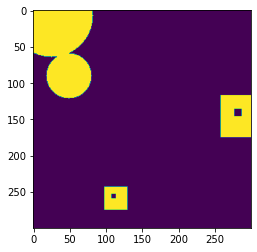

In [453]:
plt.imshow(image)

In [454]:
np.unique(image)

array([  0., 255.])

In [455]:
image.dtype

dtype('float64')

In [456]:
image = image.astype('uint8')

## 3.1. Подсчет простых объектов ##

In [457]:
comp = cv2.connectedComponents( image )

In [458]:
comp # 3-компонента без фона, поскольку есть слипшиеся

(4,
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32))

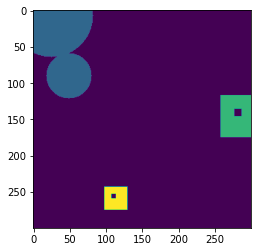

In [459]:
plt.imshow(comp[1])

Можно попробовать их разделить, чтобы получить правильное количество компонент.

In [544]:
image_1 = image.copy()

In [545]:
#kernel_dl = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10) )
kernel_er = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (18, 18) )

In [546]:
#changed = cv2.dilate(src = image_1, kernel = kernel_dl)
changed = cv2.erode(src = image_1, kernel = kernel_er)

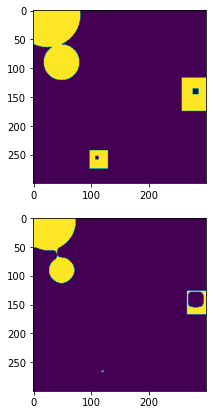

In [547]:
fig, ax = plt.subplots(2,1, figsize = (7,7))
ax[0].imshow(image_1)
ax[1].imshow(changed)

Один из квадратов стал совсемуж маленьким, но все еще существует)

In [550]:
new_comp = cv2.connectedComponents( changed )

In [554]:
new_comp # вот, теперь 5-ре компонентов, т.е. 4 + фон

(5,
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32))

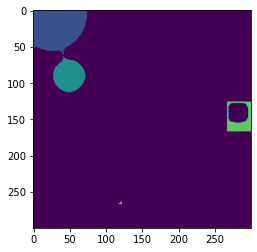

In [555]:
plt.imshow( new_comp[1] )

## Подсчет монет ##

In [556]:
coins = cv2.imread('Coins.jpg')

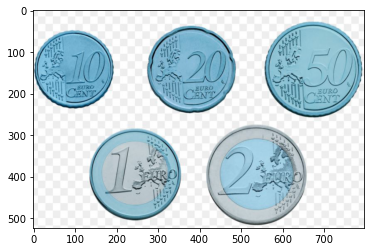

In [557]:
plt.imshow(coins)

In [559]:
coins_gray = cv2.cvtColor(coins, cv2.COLOR_RGB2GRAY)

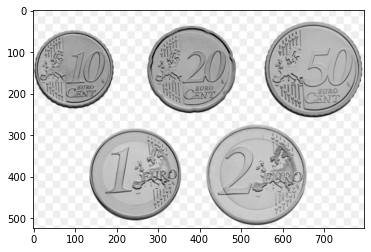

In [608]:
plt.imshow(coins_gray, cmap = 'gray')

In [609]:
coins_gray.max()

255

### Нормальный способ - через связные компоненты ###

Понятно, что трафарет здесь не справится, так что лучше просто найти связные компоненты

In [852]:
img = cv2.imread('Coins_2.jpg')
img_bin = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

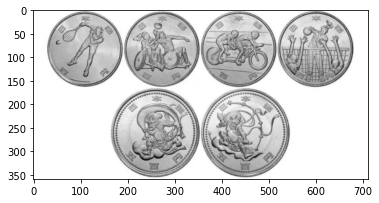

In [858]:
plt.imshow(img_bin, cmap = 'gray')

In [883]:
thr_2, thr_image_2 = cv2.threshold(img_bin, thresh = 0, maxval = 255, type = cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

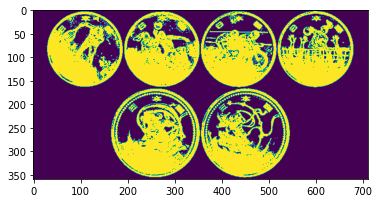

In [896]:
plt.imshow(thr_image_2)

Ради эксперимента можно попробовать размыть изображение

In [941]:
thr_image_2_med = cv2.medianBlur(thr_image_2, 7)

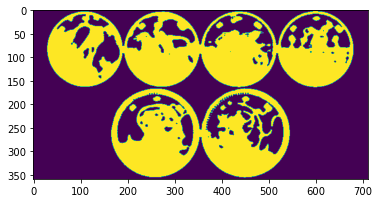

In [942]:
plt.imshow(thr_image_2_med)

In [943]:
#kernel_dl = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2) )
kernel_er = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20) )

In [944]:
#changed = cv2.dilate(src = thr_image_2_med, kernel = kernel_dl)
changed = cv2.erode(src = thr_image_2_med, kernel = kernel_er)

In [946]:
changed = cv2.erode(src = changed, kernel = kernel_er)

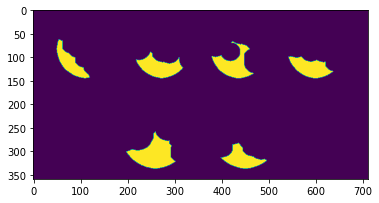

In [947]:
plt.imshow(changed) # жестко их жизнь потрепала

In [949]:
count, _ = cv2.connectedComponents(changed)

In [952]:
count - 1 # 6 компонент - 6 монеток

6

### Для разнообразия можно попробовать побалоаться с трафаретами ###

Нужно бинаризовать изображение

In [702]:
thr, thr_image = cv2.threshold(coins_gray, thresh = 100, maxval = 255, type = cv2.THRESH_BINARY)

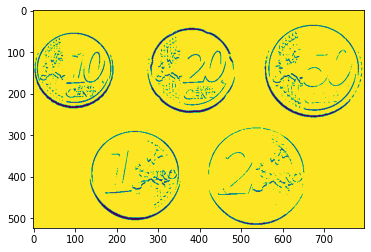

In [703]:
plt.imshow(thr_image)

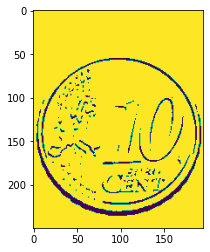

In [704]:
plt.imshow(thr_image[0:250, 0:195])

In [705]:
traf = thr_image[0:250, 0:195]

In [706]:
thr_image.shape

(524, 798)

In [707]:
tmpl = cv2.matchTemplate(thr_image, traf, cv2.TM_CCORR_NORMED)

In [708]:
tmpl.shape

(275, 604)

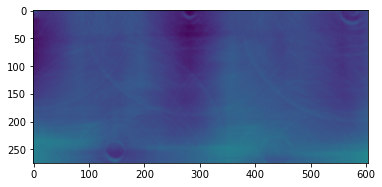

In [709]:
plt.imshow(tmpl)

In [710]:
flt_tmpl = tmpl.flatten()
flt_tmpl.sort()

In [711]:
flt_tmpl[::-1]

array([1.0000001 , 0.97659415, 0.97458494, ..., 0.92511725, 0.9249879 ,
       0.92481095], dtype=float32)

(array([4.5790e+03, 3.5493e+04, 9.7399e+04, 2.5274e+04, 3.3510e+03,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.92481095, 0.9323299 , 0.9398488 , 0.94736767, 0.9548866 ,
        0.96240556, 0.96992445, 0.97744334, 0.9849623 , 0.99248123,
        1.0000001 ], dtype=float32),
 <BarContainer object of 10 artists>)

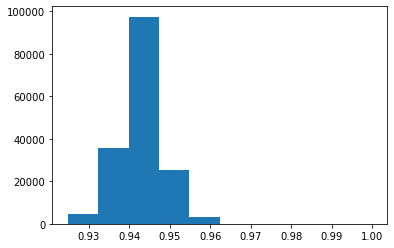

In [712]:
plt.hist(flt_tmpl)

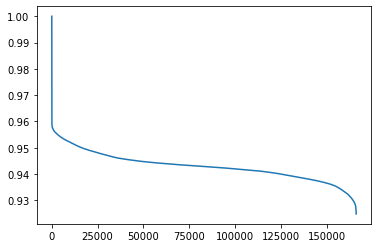

In [713]:
plt.plot(flt_tmpl[::-1])

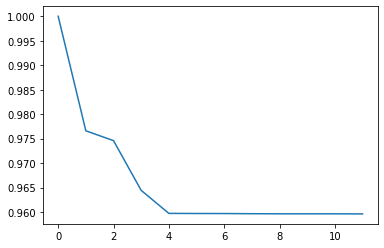

In [714]:
plt.plot(flt_tmpl[::-1][:12] )

Ну, чисто теоретически, можно увидеть (наверное), что здесь на 4-том значении обнуляется производная, значит что-то произошло, следовательно 4-ре монеты :-)

### Поиск контуров ###

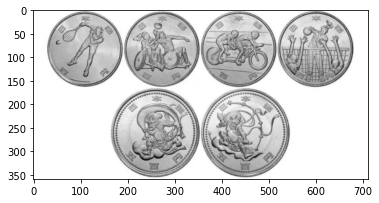

In [973]:
plt.imshow(img_bin, cmap = 'gray')

Нужно использовать производную:

In [975]:
gX = cv2.Sobel(img_bin, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = -1) # производная по иксу, позволяет увидеть резкие границы по иксу
gY = cv2.Sobel(img_bin, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = -1) # производная по игреку, позволяет увидеть резкие границы по игреку

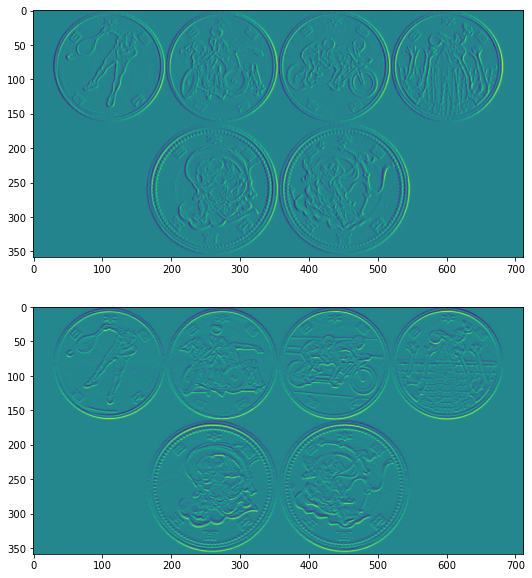

In [977]:
fig, ax = plt.subplots(2,1, figsize = (10,10))
ax[0].imshow( gX )
ax[1].imshow( gY )

**Теперь нужно объединить две производные**

In [981]:
gradient = cv2.subtract(gX, gY)
# т.е. поэлементная разность 
# показывать суммарные резкие границы, а с каким они знаком - не очень важно (наверное)
gradient = cv2.convertScaleAbs(gradient) # масштабировать и перевести в uint8

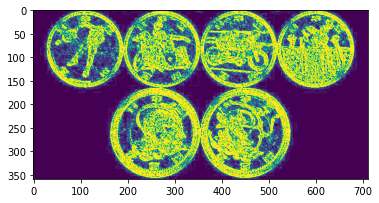

In [982]:
plt.imshow(gradient)

**Но лучше так:**

In [1039]:
tr = 250

In [1040]:
img_bord = cv2.Canny( img_bin, tr, tr*3) # Finds edges in an image using the Canny algorithm @cite Canny86 .

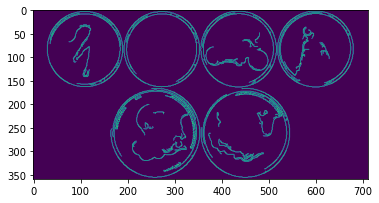

In [1041]:
plt.imshow(img_bord)